# 911 Calls Capstone Project

## Data and Setup

____
** Import numpy and pandas **

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df = pd.read_csv('911.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [8]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [11]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [12]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [14]:
len(df['title'].unique())

110

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [37]:

df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])
df['Reason']




0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: Reason, Length: 99492, dtype: object

** What is the most common Reason for a 911 call based off of this new column? **

In [40]:
df['Reason'].value_counts().head(1)

EMS    48877
Name: Reason, dtype: int64

** Now use seaborn to create a countplot of 911 calls by Reason. **

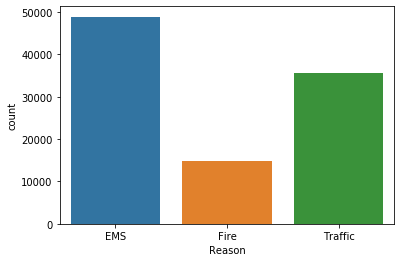

In [43]:
sns.countplot(x='Reason',data=df)

___
** Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? **

In [45]:
type(df['timeStamp'].iloc[1])

str

** You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. **

In [48]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [66]:
df['hour']=df['timeStamp'].apply(lambda time:time.hour)
df['month']=df['timeStamp'].apply(lambda time:time.month)
df['day of week']=df['timeStamp'].apply(lambda time:time.dayofweek)


In [54]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['day of week'] = df['day of week'].map(dmap)


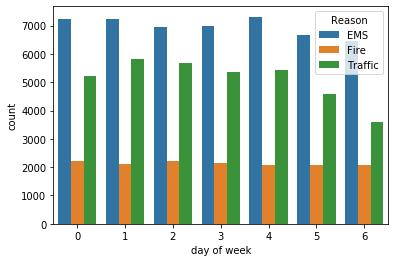

In [67]:
sns.countplot(x='day of week',data=df,hue='Reason')


**Now do the same for Month:**

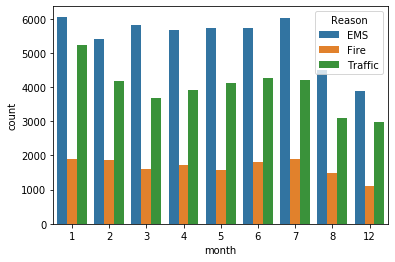

In [68]:
sns.countplot(x='month',data=df,hue='Reason')

** Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

In [71]:
byMonth = df.groupby('month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,day of week
month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


** Now create a simple plot off of the dataframe indicating the count of calls per month. **

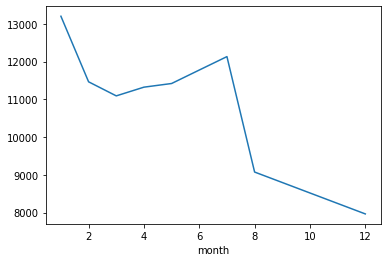

In [72]:
byMonth['twp'].plot()

** Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column. **

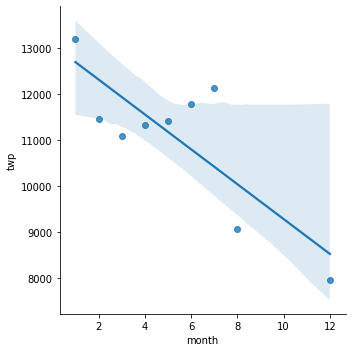

In [75]:
sns.lmplot(x='month',y='twp',data=byMonth.reset_index())

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. ** 

In [79]:
t=df['timeStamp'].iloc[0]
df['date']=df['timeStamp'].apply(lambda t: t.date())
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,month,day of week,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3,2015-12-10


** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

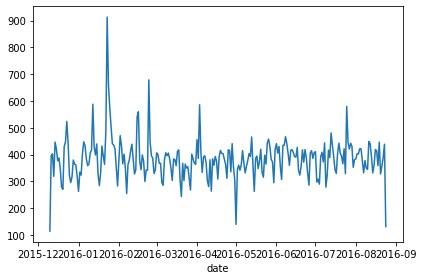

In [83]:
df.groupby('date').count()['lat'].plot()
plt.tight_layout()

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

Text(0.5, 1, 'traffic')

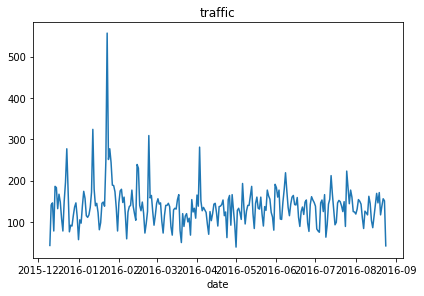

In [87]:
df[df['Reason']=='Traffic'].groupby('date').count()['lat'].plot()
plt.tight_layout()
plt.title('traffic')

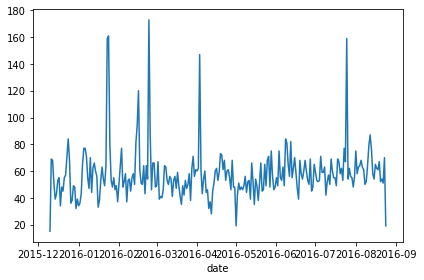

In [89]:
df[df['Reason']=='Fire'].groupby('date').count()['lat'].plot()
plt.tight_layout()

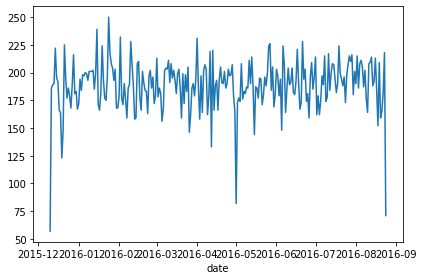

In [90]:
df[df['Reason']=='EMS'].groupby('date').count()['lat'].plot()
plt.tight_layout()

In [100]:
dayhour=df.groupby(by=['day of week','hour']).count()['Reason'].unstack()

** Now create a HeatMap using this new DataFrame. **

<Figure size 864x432 with 0 Axes>

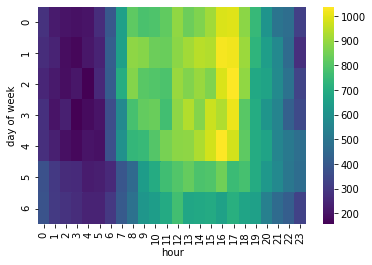

<Figure size 864x432 with 0 Axes>

In [99]:
dayhour=df.groupby(by=['day of week','hour']).count()['Reason'].unstack()
sns.heatmap(dayhour,cmap='viridis')
plt.figure(figsize=(12,6))

** Now create a clustermap using this DataFrame. **

<Figure size 864x432 with 0 Axes>

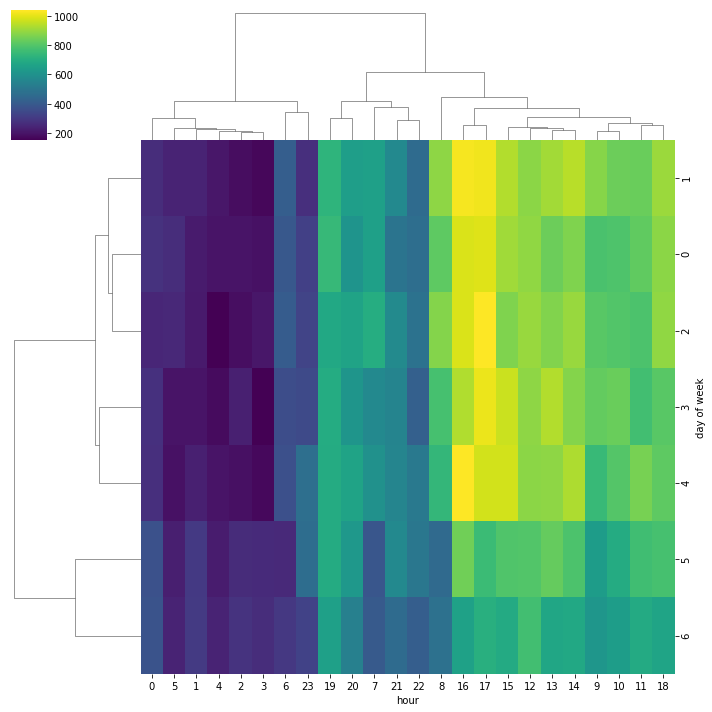

<Figure size 864x432 with 0 Axes>

In [101]:
dayhour=df.groupby(by=['day of week','hour']).count()['Reason'].unstack()
sns.clustermap(dayhour,cmap='viridis')
plt.figure(figsize=(12,6))

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

<Figure size 864x432 with 0 Axes>

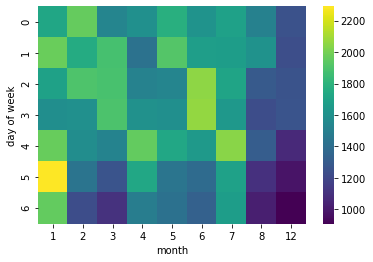

<Figure size 864x432 with 0 Axes>

In [102]:
daymth=df.groupby(by=['day of week','month']).count()['Reason'].unstack()
sns.heatmap(daymth,cmap='viridis')
plt.figure(figsize=(12,6))

<Figure size 864x432 with 0 Axes>

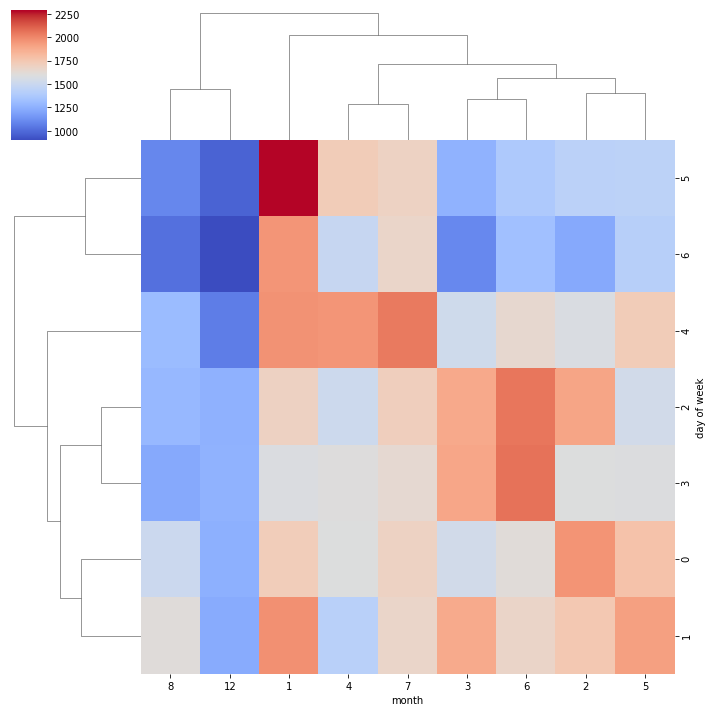

<Figure size 864x432 with 0 Axes>

In [104]:
daymth=df.groupby(by=['day of week','month']).count()['Reason'].unstack()
sns.clustermap(daymth,cmap='coolwarm')
plt.figure(figsize=(12,6))